In [2]:
import tensorflow as tf

# Ensure compatibility with Google Colab
def setup_colab():
    try:
        import google.colab
        print("Running in Google Colab")
    except ImportError:
        print("Not running in Google Colab")

setup_colab()

#  Create a random tensor of shape (4, 6)
tensor = tf.random.uniform(shape=(4, 6))

#  Find its rank and shape
rank = tf.rank(tensor)
shape = tf.shape(tensor)
print(f"Original Tensor Rank: {rank.numpy()}")
print(f"Original Tensor Shape: {shape.numpy()}")

#  Reshape to (2, 3, 4) and Transpose to (3, 2, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print(f"Reshaped Tensor Shape: {reshaped_tensor.shape}")
print(f"Transposed Tensor Shape: {transposed_tensor.shape}")

# Broadcasting a smaller tensor (1, 4) to match a larger tensor
small_tensor = tf.random.uniform(shape=(1, 4))
broadcasted_tensor = small_tensor + tf.zeros_like(transposed_tensor)[:, :, :4]  # Broadcasting
print(f"Broadcasted Tensor Shape: {broadcasted_tensor.shape}")

# Explanation of Broadcasting
broadcasting_explanation = """
Broadcasting in TensorFlow allows element-wise operations on tensors of different shapes by automatically expanding the smaller tensor.
Rules:
1. If dimensions are equal, they are compatible.
2. If one dimension is 1, it gets stretched to match the larger dimension.
3. If dimensions are different and neither is 1, broadcasting is not possible.
In our case, the (1, 4) tensor gets expanded along the first two dimensions to match (3, 2, 4), enabling element-wise addition.
"""
print(broadcasting_explanation)


Running in Google Colab
Original Tensor Rank: 2
Original Tensor Shape: [4 6]
Reshaped Tensor Shape: (2, 3, 4)
Transposed Tensor Shape: (3, 2, 4)
Broadcasted Tensor Shape: (3, 2, 4)

Broadcasting in TensorFlow allows element-wise operations on tensors of different shapes by automatically expanding the smaller tensor.
Rules:
1. If dimensions are equal, they are compatible.
2. If one dimension is 1, it gets stretched to match the larger dimension.
3. If dimensions are different and neither is 1, broadcasting is not possible.
In our case, the (1, 4) tensor gets expanded along the first two dimensions to match (3, 2, 4), enabling element-wise addition.



Running in Google Colab
MSE Loss (Initial Predictions): 0.03800000250339508
MSE Loss (Modified Predictions): 0.04399999976158142
Binary Cross-Entropy Loss (Initial Predictions): 0.20273661613464355
Binary Cross-Entropy Loss (Modified Predictions): 0.20752756297588348


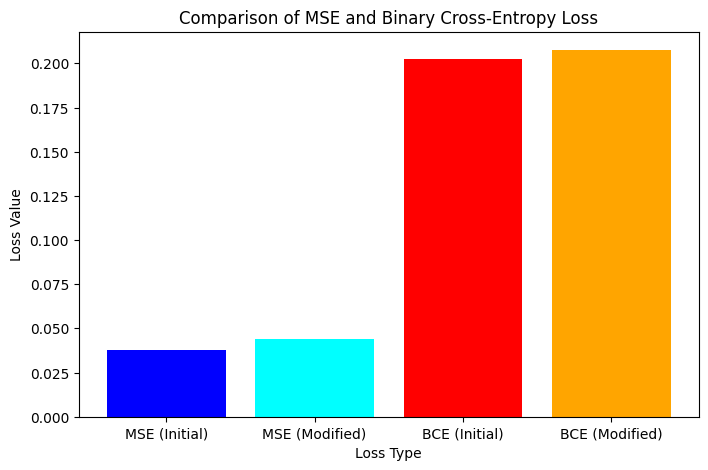

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Ensure compatibility with Google Colab
def setup_colab():
    try:
        import google.colab
        print("Running in Google Colab")
    except ImportError:
        print("Not running in Google Colab")

setup_colab()

#  Define true values (y_true) and model predictions (y_pred)
y_true = tf.constant([0, 1, 1, 0, 1], dtype=tf.float32)
y_pred1 = tf.constant([0.1, 0.9, 0.8, 0.2, 0.7], dtype=tf.float32)  # Initial predictions
y_pred2 = tf.constant([0.05, 0.85, 0.75, 0.1, 0.65], dtype=tf.float32)  # Slightly modified predictions

# Compute Mean Squared Error (MSE) and Categorical Cross-Entropy (CCE) losses
mse_loss1 = tf.keras.losses.MeanSquaredError()(y_true, y_pred1).numpy()
mse_loss2 = tf.keras.losses.MeanSquaredError()(y_true, y_pred2).numpy()
cce_loss1 = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred1).numpy()
cce_loss2 = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred2).numpy()

# Print loss values
print(f"MSE Loss (Initial Predictions): {mse_loss1}")
print(f"MSE Loss (Modified Predictions): {mse_loss2}")
print(f"Binary Cross-Entropy Loss (Initial Predictions): {cce_loss1}")
print(f"Binary Cross-Entropy Loss (Modified Predictions): {cce_loss2}")

# Plot loss function values using Matplotlib
labels = ['MSE (Initial)', 'MSE (Modified)', 'BCE (Initial)', 'BCE (Modified)']
values = [mse_loss1, mse_loss2, cce_loss1, cce_loss2]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'cyan', 'red', 'orange'])
plt.xlabel("Loss Type")
plt.ylabel("Loss Value")
plt.title("Comparison of MSE and Binary Cross-Entropy Loss")
plt.show()


Running in Google Colab
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with Adam optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8769 - loss: 0.4307 - val_accuracy: 0.9620 - val_loss: 0.1283
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9655 - loss: 0.1226 - val_accuracy: 0.9687 - val_loss: 0.1048
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9763 - loss: 0.0795 - val_accuracy: 0.9756 - val_loss: 0.0817
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9830 - loss: 0.0582 - val_accuracy: 0.9766 - val_loss: 0.0800
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9865 - loss: 0.0444 - val_accuracy: 0.9763 - val_loss: 0.0769
Training with SGD optimizer...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7405 - loss: 1.0427 - val_accuracy: 0.9049 - val_loss: 0.3591
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8988 - loss: 0.3604 - val_accuracy: 0.9203 - val_loss: 0.2916
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy:

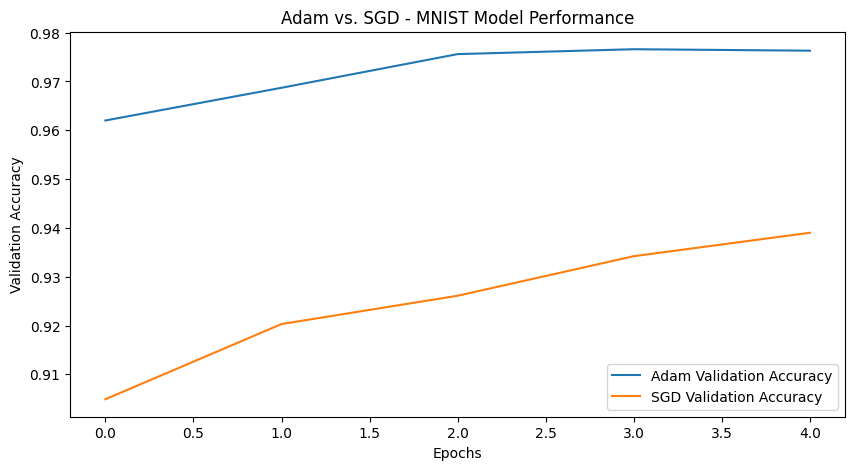

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Ensure compatibility with Google Colab
def setup_colab():
    try:
        import google.colab
        print("Running in Google Colab")
    except ImportError:
        print("Not running in Google Colab")

setup_colab()

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data

# Define a simple neural network model
def create_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Train two models - One with Adam, One with SGD
optimizers = {'Adam': keras.optimizers.Adam(), 'SGD': keras.optimizers.SGD()}
history_results = {}

for opt_name, optimizer in optimizers.items():
    print(f"Training with {opt_name} optimizer...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)
    history_results[opt_name] = history

# Compare training and validation accuracy trends
plt.figure(figsize=(10, 5))
for opt_name, history in history_results.items():
    plt.plot(history.history['val_accuracy'], label=f"{opt_name} Validation Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Adam vs. SGD - MNIST Model Performance")
plt.legend()
plt.show()

Running in Google Colab
Training model with TensorBoard logging...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8765 - loss: 0.4359 - val_accuracy: 0.9632 - val_loss: 0.1302
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9642 - loss: 0.1207 - val_accuracy: 0.9692 - val_loss: 0.1065
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9766 - loss: 0.0768 - val_accuracy: 0.9745 - val_loss: 0.0871
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9838 - loss: 0.0546 - val_accuracy: 0.9754 - val_loss: 0.0793
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9871 - loss: 0.0431 - val_accuracy: 0.9759 - val_loss: 0.0822
To view TensorBoard, run the following command in a Colab cell:
%load_ext tensorboard
%tensorboard --logdir logs/fit/


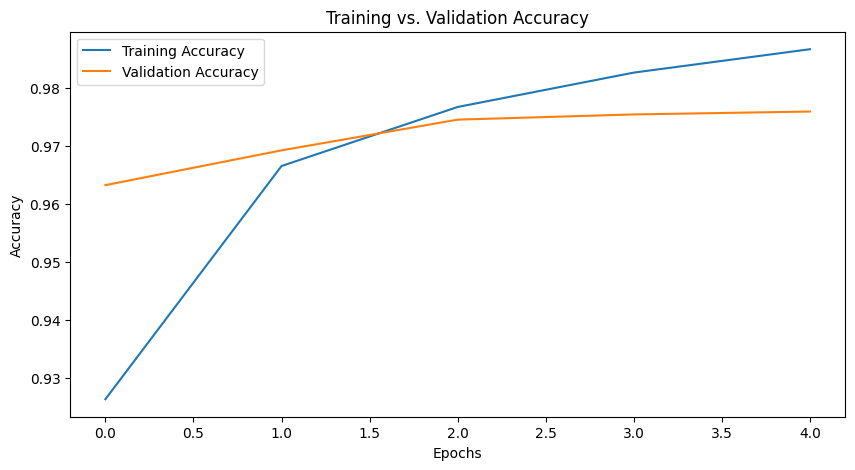

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard

# Ensure compatibility with Google Colab
def setup_colab():
    try:
        import google.colab
        print("Running in Google Colab")
    except ImportError:
        print("Not running in Google Colab")

setup_colab()

#  Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data

# Define a simple neural network model
def create_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Set up TensorBoard logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with TensorBoard logging
print("Training model with TensorBoard logging...")
model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[tensorboard_callback], verbose=1)

# Launch TensorBoard (for Google Colab users)
print("To view TensorBoard, run the following command in a Colab cell:")
print("%load_ext tensorboard")
print("%tensorboard --logdir logs/fit/")

# Plot accuracy trends
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.show()